In [2]:
import pandas as pd
import time

# 데이터 로드
start = time.time()
df = pd.read_csv('./wine_review.csv')
end = time.time()

print("Loading took " + str(round(end - start, 2)) + " seconds")

# 데이터 구조 확인
df.info()

# 데이터 샘플 확인
df.head()

Loading took 0.11 seconds
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2890 non-null   object 
 1   asins                 870 non-null    object 
 2   brand                 2825 non-null   object 
 3   categories            2890 non-null   object 
 4   dateAdded             2890 non-null   object 
 5   dateUpdated           2890 non-null   object 
 6   descriptions          2738 non-null   object 
 7   dimension             1838 non-null   object 
 8   ean                   2166 non-null   object 
 9   flavors               151 non-null    object 
 10  keys                  2890 non-null   object 
 11  manufacturer          849 non-null    object 
 12  manufacturerNumber    2457 non-null   object 
 13  name                  2890 non-null   object 
 14  reviews.date          2552 non-null   object 


,id,asins,brand,categories,dateAdded,dateUpdated,descriptions,dimension,ean,flavors,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,sourceURLs,upc,weight
0,AV13ClKCGV-KLJ3akN68,NaN,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:11Z,2018-01-10T18:06:28Z,NaN,1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This a fantastic white wine for any occasion!,My Favorite White Wine,NaN,NaN,Bjh,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,4.9213E+11,1.0 lbs
1,AV13CsvW-jtxr-f38AQO,NaN,Fresh Craft Co.,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:42Z,2018-01-10T05:38:33Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",4.25 in x 4.25 in x 5.25 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,"Tart, not sweet...very refreshing and delicious!",Yum!!,NaN,NaN,Wino,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,83120003441,2.45 lbs
2,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,I was given this wine so it was a delightful s...,A New Favorite!,NaN,NaN,Bama Mom,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
3,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This is a phenomenal wine and my new favorite ...,"Bold, Flavorful, Aromatic, Delicious",NaN,NaN,Av Dub,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
4,AV13CYL4-jtxr-f37_-t,NaN,Wine Cube153,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:18Z,2018-01-10T18:06:29Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,4 750ml bottles for the price of two With way ...,"Yum! Plus, Environmentally Friendly!",Overland Park,NaN,Chelseamay,NaN,https://redsky.target.com/groot-domain-api/v1/...,85200600465,1.0 lbs


In [3]:
# 감성 분석에 필요한 컬럼만 선택
df = df[['reviews.text']]

# 결측값 확인
df.isnull().sum()

reviews.text    1
dtype: int64

In [4]:
# 결측값 제거
df = df.dropna(subset=['reviews.text'])

# 컬럼명 변경
df = df.rename(columns={'reviews.text': 'reviews_text'})

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2889 entries, 0 to 2889
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reviews_text  2889 non-null   object
dtypes: object(1)
memory usage: 45.1+ KB


,reviews_text
0,This a fantastic white wine for any occasion!
1,"Tart, not sweet...very refreshing and delicious!"
2,I was given this wine so it was a delightful s...
3,This is a phenomenal wine and my new favorite ...
4,4 750ml bottles for the price of two With way ...


In [5]:
%pip install nltk
import time
import pandas as pd
import nltk as nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer # nltk의 VADER 감정 분석기를 가져옮
nltk.download('vader_lexicon') # VADER 감정 분석기에 필요한 어휘 자료를 다운로드

nltk.download('stopwords')

# Remove stop words - can be slow for a lot of text!
# Ryan Han (ryanxjhan on Kaggle) has a great post measuring performance of different stop words removal approaches
# https://www.kaggle.com/ryanxjhan/fast-stop-words-removal # using the approach that Ryan recommends
start = time.time()
cache = set(stopwords.words("english"))
def remove_stopwords(review):
    text = " ".join([word for word in review.split() if word not in cache])
    return text

# Remove the stop words from both columns
df.reviews_text = df.reviews_text.apply(remove_stopwords)   

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
vader_sentiment = SentimentIntensityAnalyzer() # VADER 감정 분석기를 초기화

# There are 3 possibilities of input for a review:
# It could be "No Negative", in which case, return 0
# It could be "No Positive", in which case, return 0
# It could be a review, in which case calculate the sentiment
def calc_sentiment(review):    
    if review == "No Negative" or review == "No Positive": # 리뷰가 "No Negative" 또는 "No Positive"인 경우
        return 0
    return vader_sentiment.polarity_scores(review)["compound"]  # 리뷰가 텍스트인 경우 VADER 감정 분석기를 사용하여 감정 점수(컴파운드 스코어)를 계산하고 반환

In [7]:
# Add a negative sentiment and positive sentiment column
print("Calculating sentiment columns for both positive and negative reviews")
start = time.time()
df["Sentiment"] = df.reviews_text.apply(calc_sentiment)
end = time.time()
print("Calculating sentiment took " + str(round(end - start, 2)) + " seconds")

Calculating sentiment columns for both positive and negative reviews
Calculating sentiment took 0.68 seconds


In [8]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2889 entries, 0 to 2889
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   reviews_text  2889 non-null   object 
 1   Sentiment     2889 non-null   float64
dtypes: float64(1), object(1)
memory usage: 67.7+ KB


,reviews_text,Sentiment
0,This fantastic white wine occasion!,0.5983
1,"Tart, sweet...very refreshing delicious!",0.6114
2,I given wine delightful surprise find flavorfu...,0.8949
3,This phenomenal wine new favorite red.,0.4588
4,4 750ml bottles price two With way less packag...,0.9525


In [9]:
# Print of the results and see if the sentiment matches the review

df = df.sort_values(by=["Sentiment"], ascending=True)
print(df[["reviews_text", "Sentiment"]])

                                           reviews_text  Sentiment
2380  little jar's contents item go stress seasonal ...    -0.9042
1440  First, let's establish whole point buying tube...    -0.8779
2877  I purchased give gifts last year I tried wine ...    -0.8625
2869  I purchased give gifts last year I tried wine ...    -0.8625
2516  I 17 I first started use it. I went visit gran...    -0.8526
...                                                 ...        ...
2873  I'm really picky wine. To honest, I've cheap w...     0.9930
978   Hi, Cocktail Artist Robert Porter. First, I'd ...     0.9930
2802  I knew Kevin O'Leary loved good wine. Well, le...     0.9946
373   I love love love mix. I'm usually mix girl, I ...     0.9955
1124  Do love margaritas They among popular adult be...     0.9976

[2889 rows x 2 columns]


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 감성 점수 분리
df['compound'] = df['reviews_text'].apply(lambda text: vader_sentiment.polarity_scores(text)['compound'])

# 긍정/부정 레이블 생성
df['sentiment_label'] = df['compound'].apply(lambda x: 1 if x >= 0 else 0)

# 특징 및 레이블 설정
X = df['reviews_text']
y = df['sentiment_label']

# 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# 파이프라인 구성
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(solver='liblinear'))
])

# 하이퍼파라미터 그리드 설정
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__max_df': [0.75, 1.0],
    'clf__C': [0.1, 1, 10]
}

# 그리드 서치 적용
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
best_params = grid_search.best_params_

In [18]:
# 테스트 세트 예측
y_pred = grid_search.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, grid_search.decision_function(X_test))

# 평가 결과
evaluation_results = {
    'Best Params': best_params,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC': roc_auc
}

evaluation_results

{'Best Params': {'clf__C': 10,
  'tfidf__max_df': 0.75,
  'tfidf__ngram_range': (1, 1)},
 'Accuracy': 0.9377162629757786,
 'Precision': 0.9396092362344582,
 'Recall': 0.9962335216572504,
 'F1 Score': 0.9670932358318098,
 'ROC-AUC': 0.894578675321553}

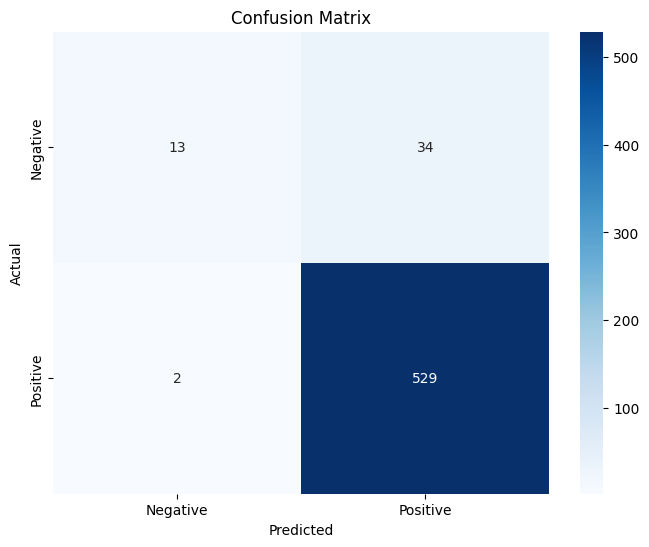

In [20]:
# 혼동 행렬 생성
conf_matrix = confusion_matrix(y_test, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


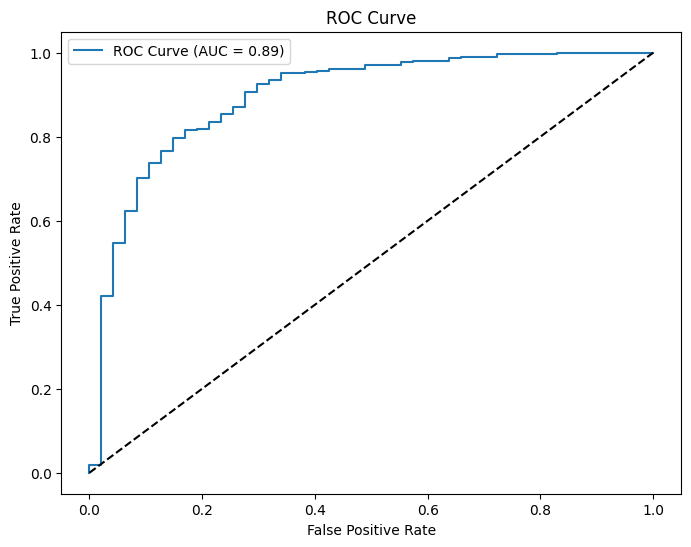

In [21]:

# ROC 곡선 시각화
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, grid_search.decision_function(X_test))
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [22]:
df

,reviews_text,Sentiment,compound,sentiment_label
2380,little jar's contents item go stress seasonal ...,-0.9042,-0.9042,0
1440,"First, let's establish whole point buying tube...",-0.8779,-0.8779,0
2877,I purchased give gifts last year I tried wine ...,-0.8625,-0.8625,0
2869,I purchased give gifts last year I tried wine ...,-0.8625,-0.8625,0
2516,I 17 I first started use it. I went visit gran...,-0.8526,-0.8526,0
...,...,...,...,...
2873,"I'm really picky wine. To honest, I've cheap w...",0.9930,0.9930,1
978,"Hi, Cocktail Artist Robert Porter. First, I'd ...",0.9930,0.9930,1
2802,"I knew Kevin O'Leary loved good wine. Well, le...",0.9946,0.9946,1
373,"I love love love mix. I'm usually mix girl, I ...",0.9955,0.9955,1
